## Data Preprocessing

In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [120]:
data = pd.read_csv('docs/anxiety_attack_dataset.csv')
data=data.drop(columns=["ID"])
# There are not duplicated rows in the dataset
data.duplicated().value_counts()
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")

Age
False    12000
Name: count, dtype: int64
 
Gender
False    12000
Name: count, dtype: int64
 
Occupation
False    12000
Name: count, dtype: int64
 
Sleep Hours
False    12000
Name: count, dtype: int64
 
Physical Activity (hrs/week)
False    12000
Name: count, dtype: int64
 
Caffeine Intake (mg/day)
False    12000
Name: count, dtype: int64
 
Alcohol Consumption (drinks/week)
False    12000
Name: count, dtype: int64
 
Smoking
False    12000
Name: count, dtype: int64
 
Family History of Anxiety
False    12000
Name: count, dtype: int64
 
Stress Level (1-10)
False    12000
Name: count, dtype: int64
 
Heart Rate (bpm during attack)
False    12000
Name: count, dtype: int64
 
Breathing Rate (breaths/min)
False    12000
Name: count, dtype: int64
 
Sweating Level (1-5)
False    12000
Name: count, dtype: int64
 
Dizziness
False    12000
Name: count, dtype: int64
 
Medication
False    12000
Name: count, dtype: int64
 
Therapy Sessions (per month)
False    12000
Name: count, dtype: int64
 
Recen

###### Homogeneous preprocessing


Class distribution for 'Dizziness':
Dizziness
0    70.05
1    29.95
Name: proportion, dtype: float64


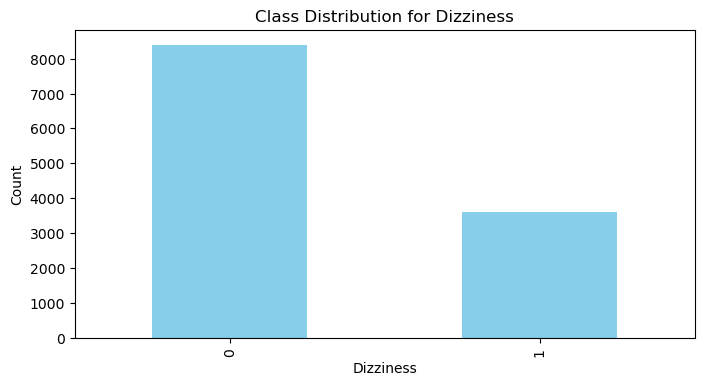


Class distribution for 'Medication':
Medication
0    80.041667
1    19.958333
Name: proportion, dtype: float64


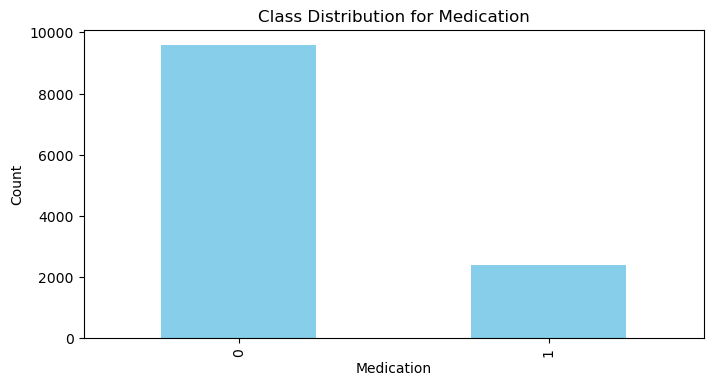


Class distribution for 'Smoking':
Smoking
0    70.141667
1    29.858333
Name: proportion, dtype: float64


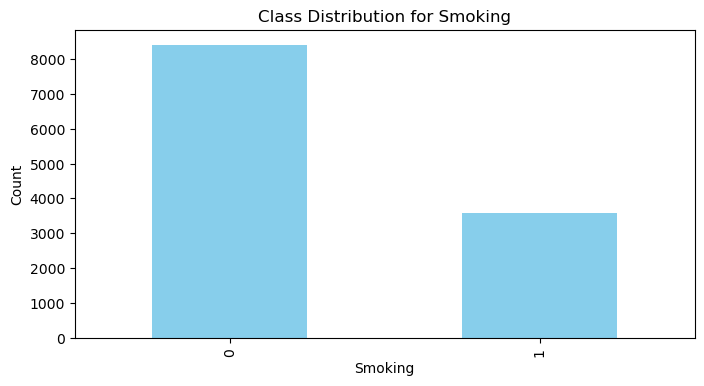


Class distribution for 'Recent Major Life Event':
Recent Major Life Event
0    75.45
1    24.55
Name: proportion, dtype: float64


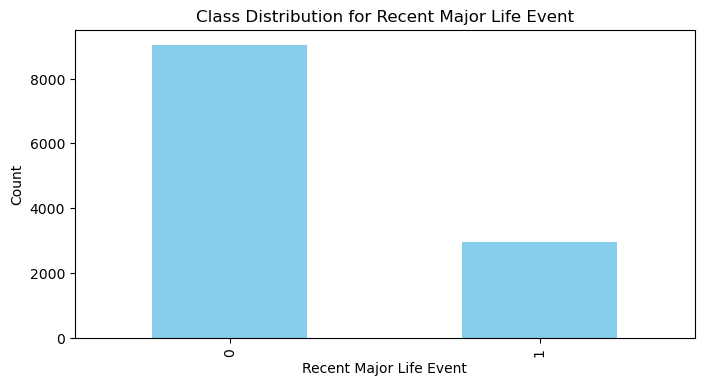


Class distribution for 'Family History of Anxiety':
Family History of Anxiety
0    59.825
1    40.175
Name: proportion, dtype: float64


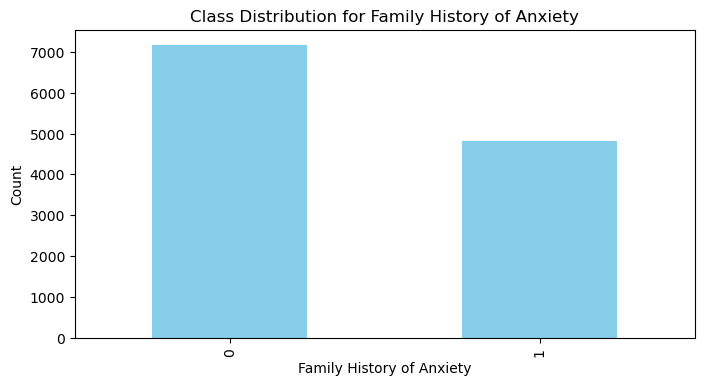


Class distribution for 'Occupation':
Occupation
Unemployed    17.825
Doctor        16.700
Teacher       16.500
Other         16.425
Student       16.275
Engineer      16.275
Name: proportion, dtype: float64


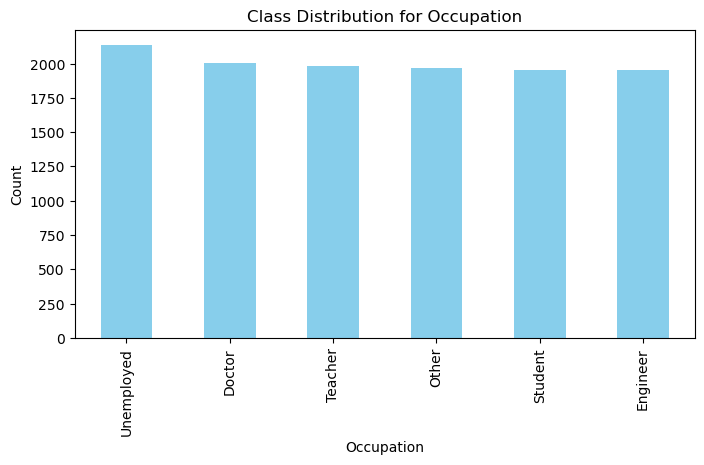


Class distribution for 'Gender':
Gender
Female    48.408333
Male      47.691667
Other      3.900000
Name: proportion, dtype: float64


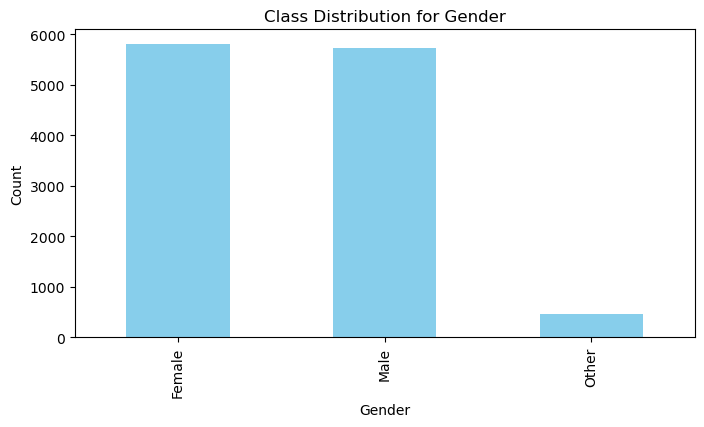

In [121]:
# 1. Handle Binary Categorical Variables
binary_cols = ['Dizziness', 'Medication', 'Smoking', 'Recent Major Life Event', "Family History of Anxiety"]
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
    
# Check class distribution for each categorical variable
categorical_cols= binary_cols+['Occupation']+['Gender']
for col in categorical_cols:
    print(f"\nClass distribution for '{col}':")
    class_counts = data[col].value_counts(normalize=True) * 100  # Percentage distribution
    print(class_counts)
    # Plot class distribution
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Class Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
# 2. One-Hot Encoding for Multi-Class Categorical Variables
encoder = OneHotEncoder(drop='first')
encoded_cols = encoder.fit_transform(data[['Occupation']])
encoded_df = pd.DataFrame(
    encoded_cols.toarray(),  # Explicitly convert to dense array
    columns=encoder.get_feature_names_out(['Occupation'])
)
data = pd.concat([data.drop(['Occupation'], axis=1), encoded_df], axis=1)

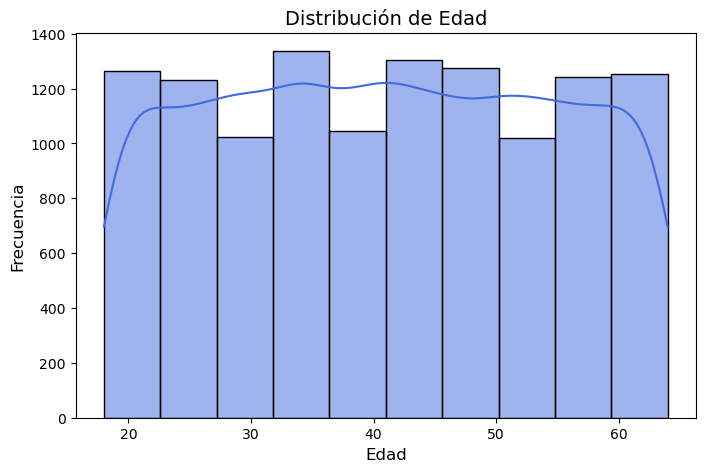

In [122]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True, color='royalblue')

plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de Edad", fontsize=14)
plt.show()

Age
0-18      246
19-30    3040
31-40    2616
41-50    2582
51-60    2501
61-70    1015
Name: count, dtype: int64


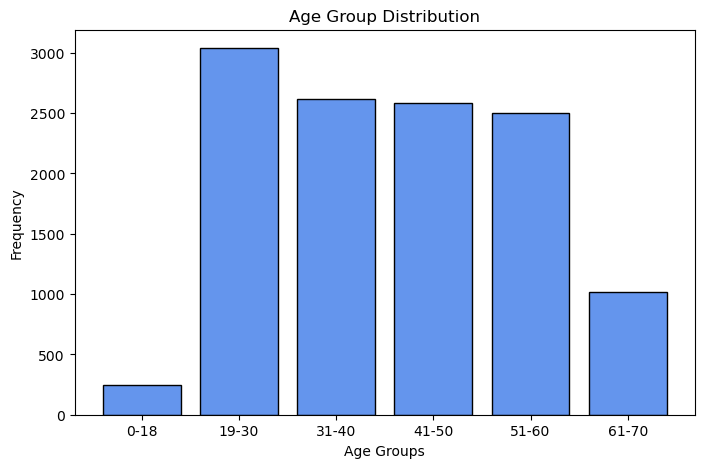

,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),...,Occupation_Unemployed,Age_0-18,Age_19-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Gender_Female,Gender_Male,Gender_Other
0,9.6,8.3,175,6,0,0,4,145,33,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,6.4,7.3,97,6,0,0,3,143,18,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,6.9,1.0,467,14,0,0,2,60,34,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,9.2,3.7,471,16,0,1,6,94,19,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,9.2,2.5,364,2,0,1,7,152,15,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [123]:
Age = data['Age']
bins = [0, 18, 30, 40, 50, 60, 70]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70']

# Create age groups
groups = pd.cut(Age, bins=bins, labels=labels)

# Count occurrences in each group
group_counts = groups.value_counts().sort_index()

# Display group counts
print(group_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.bar(group_counts.index, group_counts.values, color='cornflowerblue', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

# One hot-encoding keeping the grouped column for visualization
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(groups.to_frame())
data = pd.concat([data.drop(['Age'], axis=1), array], axis=1)

Gender = data['Gender']
# One hot-encoding
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(data[['Gender']])
data = pd.concat([data.drop(['Gender'], axis=1), array], axis=1)
data.head()

 Detecting outliers and visualizing the distribution of numerical variables:

Sleep Hours: 0 outliers detected


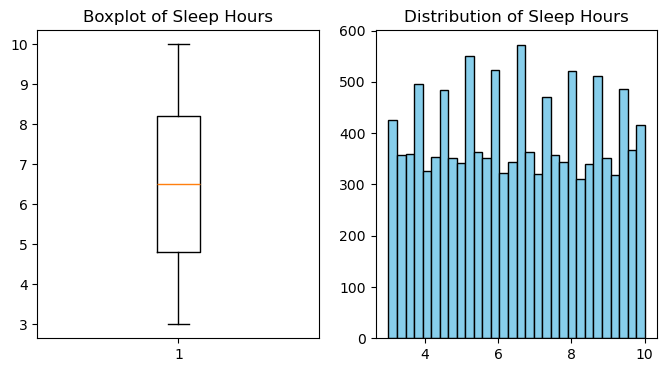

Physical Activity (hrs/week): 0 outliers detected


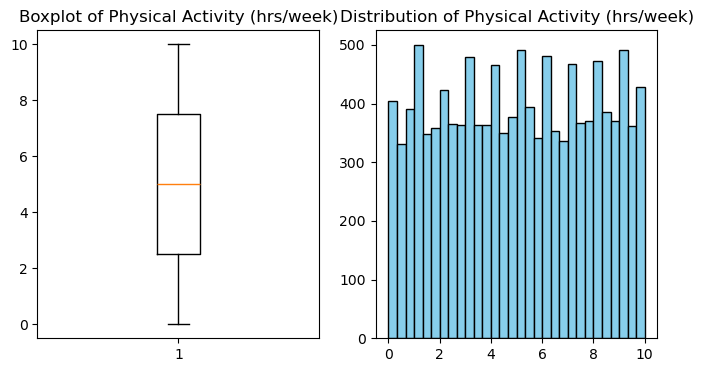

Caffeine Intake (mg/day): 0 outliers detected


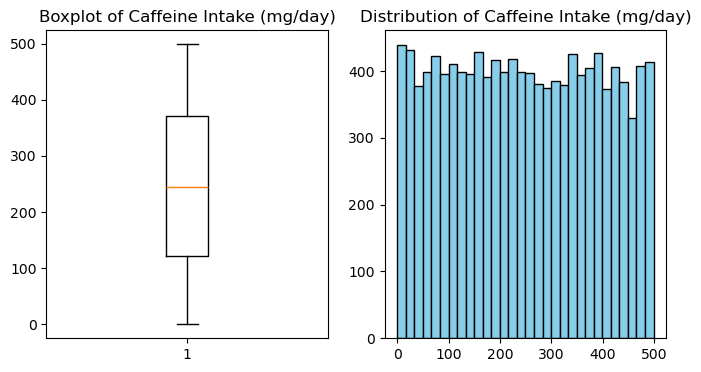

Alcohol Consumption (drinks/week): 0 outliers detected


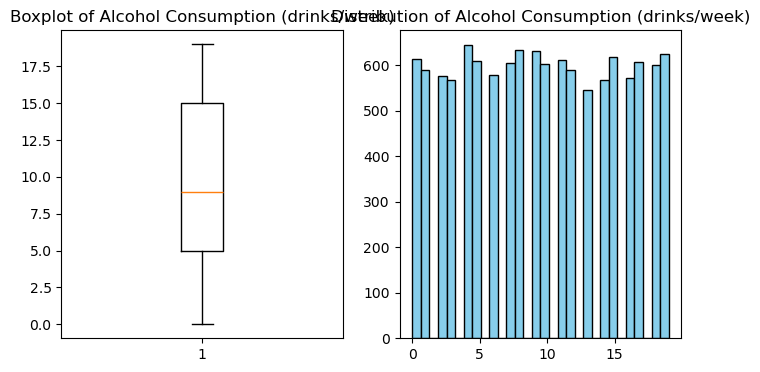

Therapy Sessions (per month): 0 outliers detected


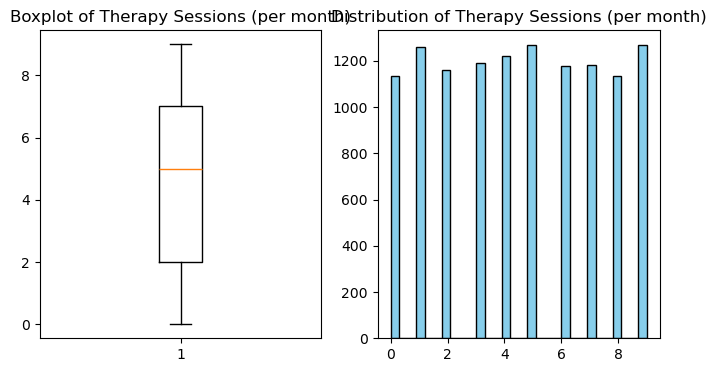

Diet Quality (1-10): 0 outliers detected


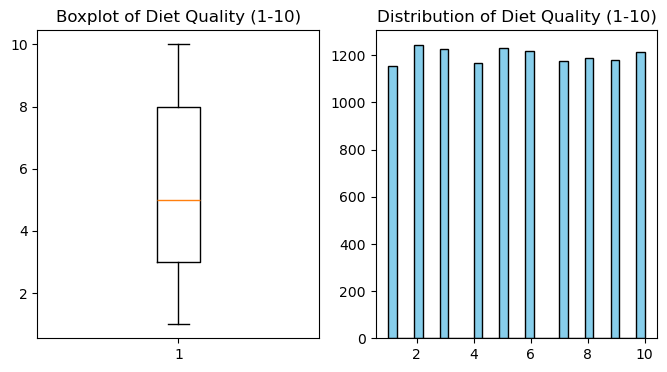

Stress Level (1-10): 0 outliers detected


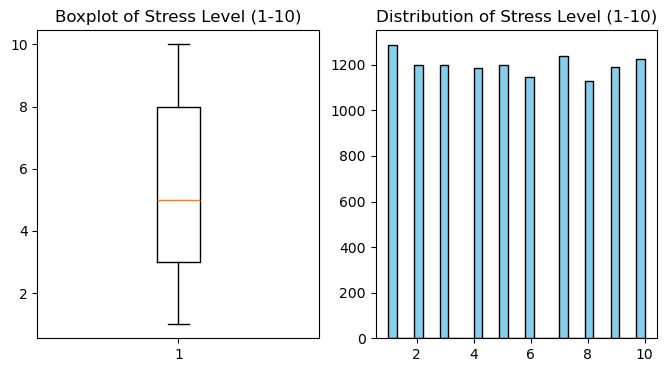

Heart Rate (bpm during attack): 0 outliers detected


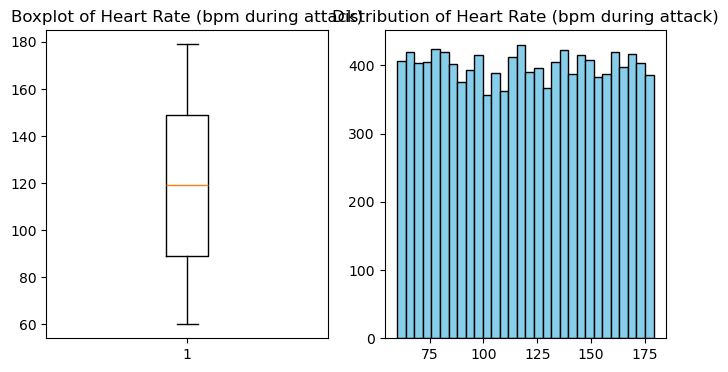

Breathing Rate (breaths/min): 0 outliers detected


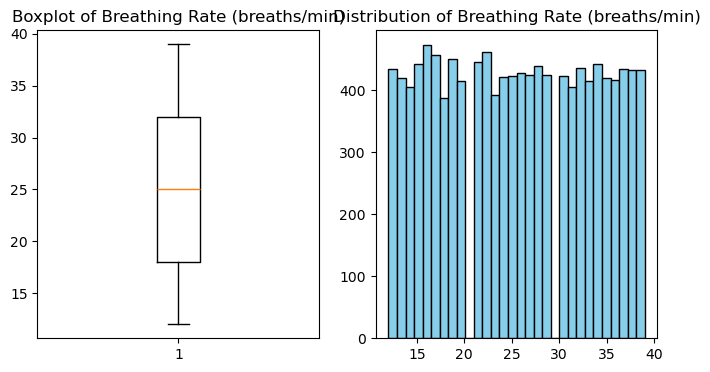

Sweating Level (1-5): 0 outliers detected


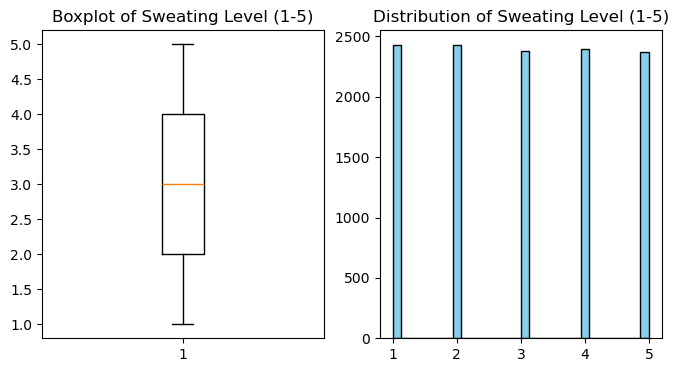


 Summary of detected outliers:
- Sleep Hours: 0 outliers
- Physical Activity (hrs/week): 0 outliers
- Caffeine Intake (mg/day): 0 outliers
- Alcohol Consumption (drinks/week): 0 outliers
- Therapy Sessions (per month): 0 outliers
- Diet Quality (1-10): 0 outliers
- Stress Level (1-10): 0 outliers
- Heart Rate (bpm during attack): 0 outliers
- Breathing Rate (breaths/min): 0 outliers
- Sweating Level (1-5): 0 outliers

 Numerical variables successfully normalized.


,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),...,Occupation_Unemployed,Age_0-18,Age_19-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Gender_Female,Gender_Male,Gender_Other
0,1.547225,1.131618,-0.496232,-0.605436,0,0,-0.504732,0.735564,0.931686,0.008896,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.041021,0.785463,-1.036095,-0.605436,0,0,-0.849907,0.678102,-0.922375,1.422901,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.207142,-1.395313,1.524795,0.781257,0,0,-1.195082,-1.706595,1.055290,-1.405108,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.348694,-0.460695,1.552480,1.127930,0,1,0.185618,-0.729732,-0.798771,-1.405108,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.348694,-0.876081,0.811898,-1.298782,0,1,0.530793,0.936683,-1.293187,0.715899,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-1.033675,-0.322233,0.784213,-1.472119,1,1,-1.540258,0.563176,-0.675167,-0.698106,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11996,1.696123,-0.979927,1.289470,-0.952109,0,1,-0.504732,0.879221,0.931686,-0.698106,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11997,1.646490,1.062387,-0.738478,1.647940,1,0,-1.195082,-1.103238,0.931686,-0.698106,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11998,-0.289185,0.543155,-0.918432,0.434584,0,0,1.221143,-0.844657,-1.416791,1.422901,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [124]:
# 3. Normalize Numerical Variables
numerical_cols = [
    'Sleep Hours', 
    'Physical Activity (hrs/week)', 
    'Caffeine Intake (mg/day)', 
    'Alcohol Consumption (drinks/week)', 
    'Therapy Sessions (per month)', 
    'Diet Quality (1-10)',
    "Stress Level (1-10)",
    "Heart Rate (bpm during attack)",
    "Breathing Rate (breaths/min)",
    "Sweating Level (1-5)"
]
def detect_outliers_and_normalize(data, numerical_cols):
    print(" Detecting outliers and visualizing the distribution of numerical variables:\n")

    outliers_info = {}

    for col in numerical_cols:
        # Calculate the Interquartile Range (IQR)
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        num_outliers = len(outliers)
        outliers_info[col] = num_outliers

        # Display outlier information
        print(f"{col}: {num_outliers} outliers detected")

        # Visualize the variable distribution with a boxplot
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.boxplot(data[col])
        plt.title(f'Boxplot of {col}')

        # Visualize with a histogram
        plt.subplot(1, 2, 2)
        plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')

        plt.show()

    print("\n Summary of detected outliers:")
    for col, count in outliers_info.items():
        print(f"- {col}: {count} outliers")

    # Normalize numerical variables with StandardScaler
    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    print("\n Numerical variables successfully normalized.")

    return data
detect_outliers_and_normalize(data, numerical_cols)


##### data split

In [125]:
train, test =train_test_split(
    data,
    test_size=0.2,

    random_state=0,
    shuffle=True,
    stratify=data['Severity of Anxiety Attack (1-10)']
)

train_X = train.drop(columns=['Severity of Anxiety Attack (1-10)'])
train_Y = train['Severity of Anxiety Attack (1-10)']
test_X = test.drop(columns=['Severity of Anxiety Attack (1-10)'])
test_Y = test['Severity of Anxiety Attack (1-10)']

Feature selection

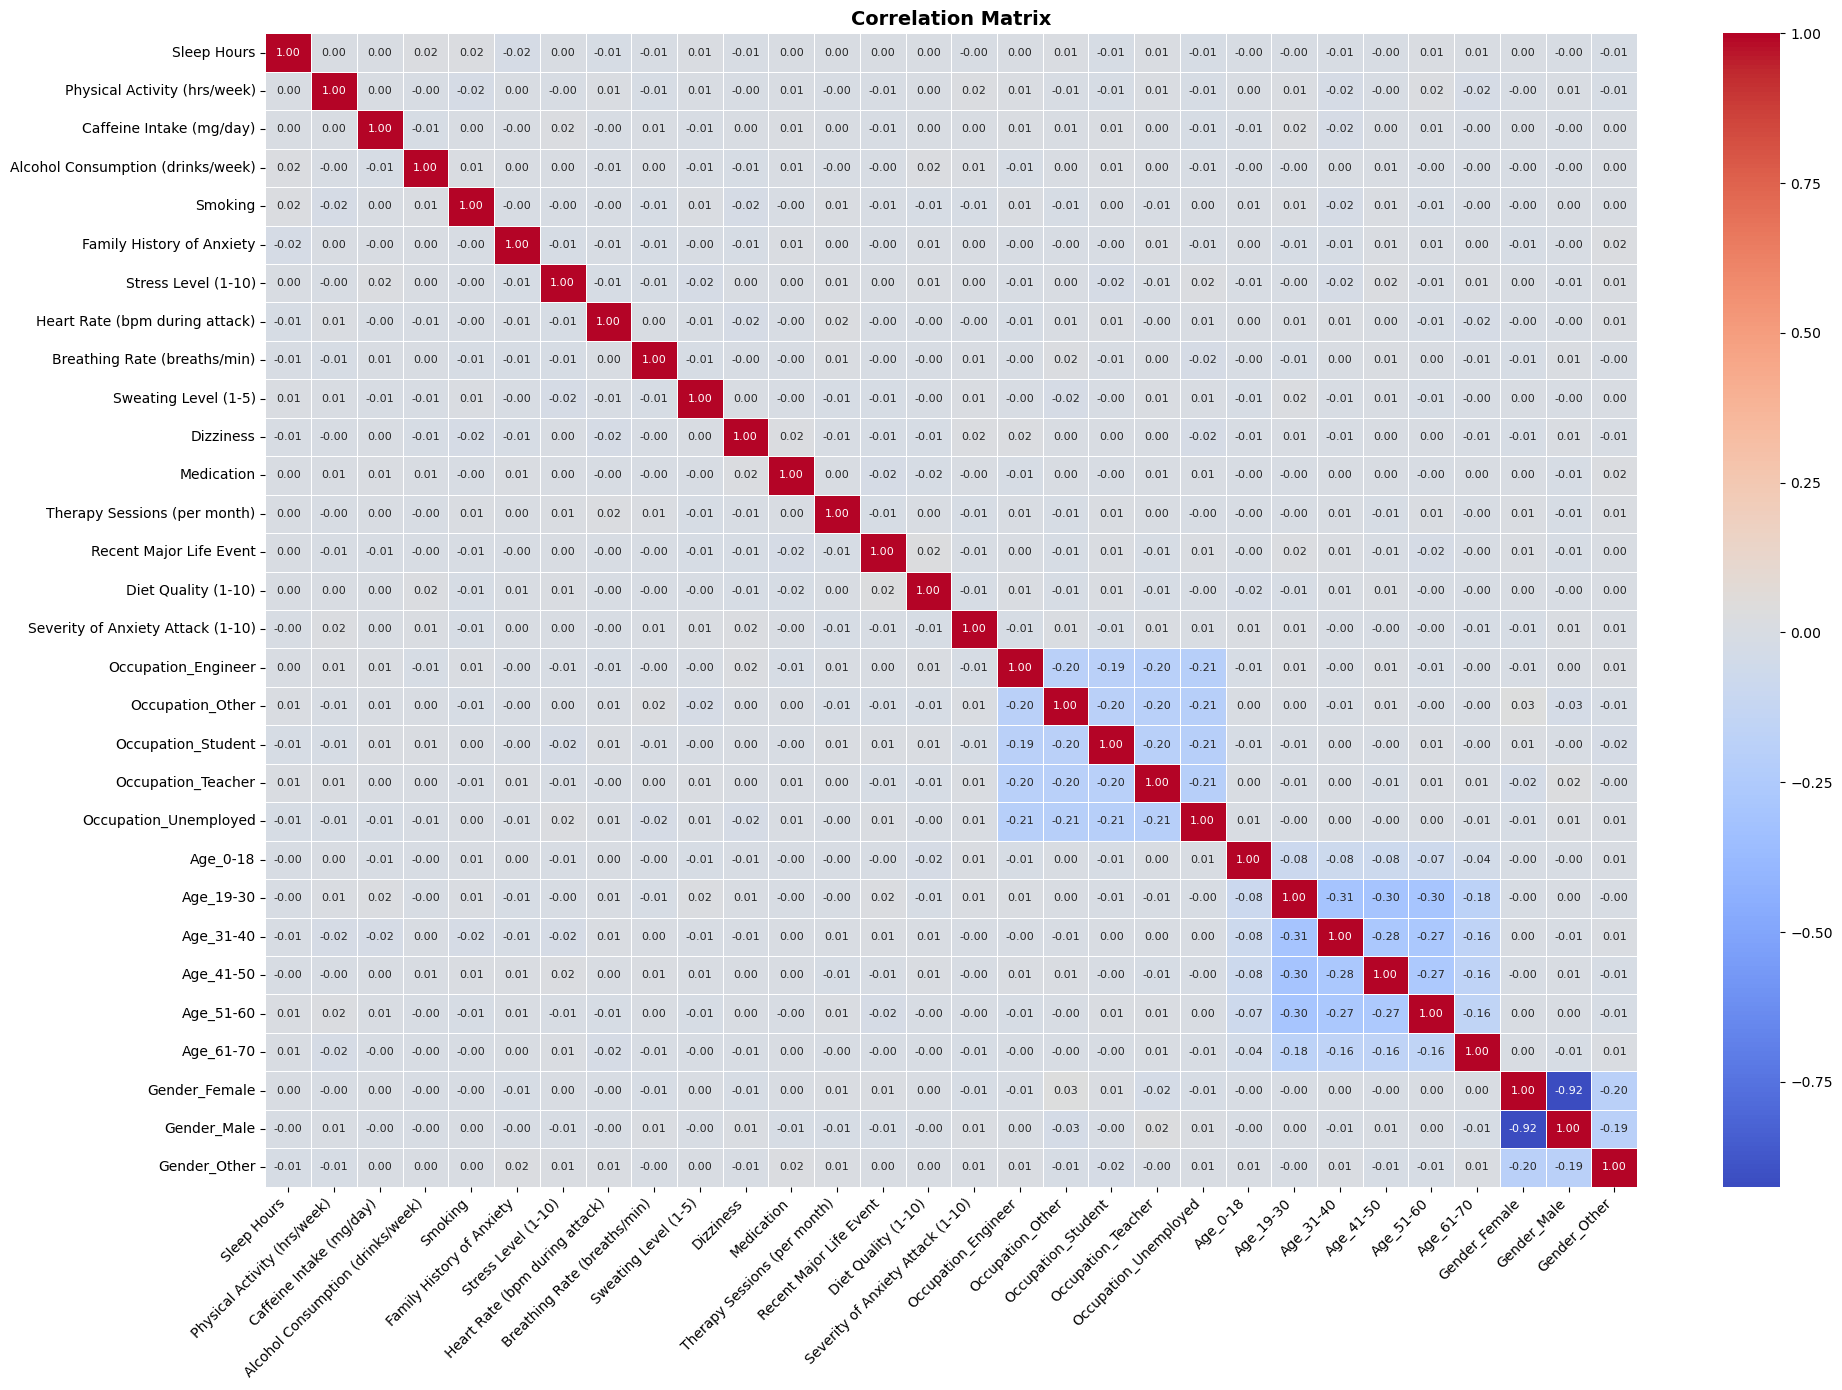

In [126]:
#calculate the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

Varianza explicada por componente:
[3.85539751e-01 4.92190912e-02 4.91368748e-02 4.79542365e-02
 4.78782931e-02 4.72761277e-02 4.68850160e-02 4.65372370e-02
 4.60921806e-02 4.55574119e-02 4.53171986e-02 2.26724497e-02
 1.15109332e-02 1.13005934e-02 1.02976151e-02 1.00851442e-02
 9.93097217e-03 9.64629752e-03 8.73934644e-03 8.21283372e-03
 7.74662468e-03 7.70754213e-03 7.66367134e-03 7.44138751e-03
 4.56737270e-03 2.64384362e-03 1.31032269e-03 1.12963146e-03
 1.99421721e-18 0.00000000e+00]


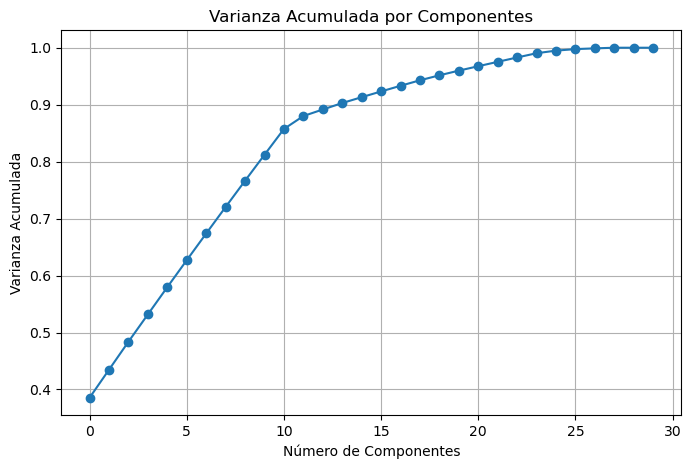

Número óptimo de componentes para explicar el 95% de la varianza: 19
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.490172  0.324693  0.058993 -1.111397  0.729698  0.937165  0.965281   
1  2.504197  1.853477 -1.410527 -0.494407  1.065372 -1.035817  0.726023   
2 -0.530981 -0.615815  1.914982 -0.206966 -2.026112  0.385779  1.006848   
3  2.488929  0.347422  2.020633  0.521166 -0.395235  0.409009  0.158148   
4 -4.501925  0.889975 -0.750847  1.923472  0.440685  0.345551 -0.961042   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.545769 -0.384753 -1.265851  1.342420  0.777627 -0.037474 -0.422593   
1  0.938084  0.160434 -0.315043  0.817782 -0.723457 -0.100161 -0.527071   
2  1.085848 -0.059388 -1.269542 -1.853143  0.717570 -0.022151 -0.579649   
3 -1.181949  1.157058 -0.800513 -0.884742 -0.709456 -0.578047  0.403642   
4 -0.580496  2.144384 -0.431357  1.343594 -0.726215  0.282037  0.935205   

       PC15      PC16      PC

In [127]:
#PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_scaled = data.select_dtypes(include=[np.number])
X=data
pca = PCA(n_components=None)

# Ajustar PCA a los datos
X_pca = pca.fit_transform(X_scaled)

# Mostrar varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Varianza explicada por componente:\n{explained_variance_ratio}')

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title('Varianza Acumulada por Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

# Calcular varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Número de componentes que explican 95% de la varianza
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Número óptimo de componentes para explicar el 95% de la varianza: {n_components}')

# Aplicar PCA con el número óptimo de componentes
pca_opt = PCA(n_components=n_components)
X_reduced = pca_opt.fit_transform(X_scaled)

# Convertir el resultado a DataFrame si es necesario
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
print(X_reduced_df.head())

# Mostrar pesos de cada componente
loadings = pd.DataFrame(pca_opt.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(n_components)])
print(loadings)


In [128]:
# Usar X_reduced_df para modelado
X_reduced_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,4.490172,0.324693,0.058993,-1.111397,0.729698,0.937165,0.965281,0.545769,-0.384753,-1.265851,1.342420,0.777627,-0.037474,-0.422593,-0.068715,0.266365,0.757065,-0.417864,0.678132
1,2.504197,1.853477,-1.410527,-0.494407,1.065372,-1.035817,0.726023,0.938084,0.160434,-0.315043,0.817782,-0.723457,-0.100161,-0.527071,0.529152,0.629799,-0.696736,-0.096221,-0.262945
2,-0.530981,-0.615815,1.914982,-0.206966,-2.026112,0.385779,1.006848,1.085848,-0.059388,-1.269542,-1.853143,0.717570,-0.022151,-0.579649,-0.732037,-0.525308,-0.173380,-0.268468,0.592607
3,2.488929,0.347422,2.020633,0.521166,-0.395235,0.409009,0.158148,-1.181949,1.157058,-0.800513,-0.884742,-0.709456,-0.578047,0.403642,-0.220098,0.281594,0.678711,-0.303498,0.709470
4,-4.501925,0.889975,-0.750847,1.923472,0.440685,0.345551,-0.961042,-0.580496,2.144384,-0.431357,1.343594,-0.726215,0.282037,0.935205,-0.246972,0.026338,0.018703,-0.333912,-0.356024


In [129]:
from sklearn.model_selection import train_test_split


y = data['Severity of Anxiety Attack (1-10)'] 

# Dividir datos para entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y, test_size=0.5, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (6000, 19)
Tamaño del conjunto de prueba: (6000, 19)


##### Decision Tree

✅ Best max_depth: 6
📊 Best cross-validated accuracy: 1.0000


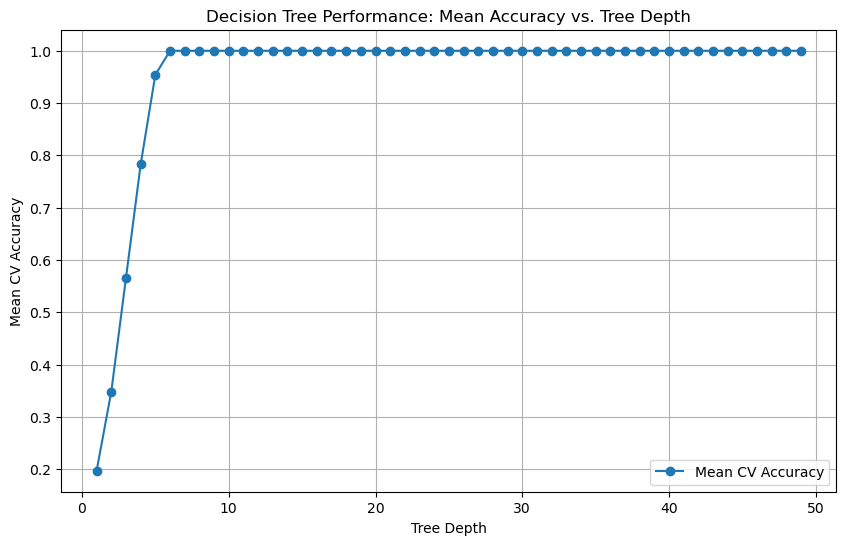

🎯 Test accuracy with max_depth=6: 1.0000


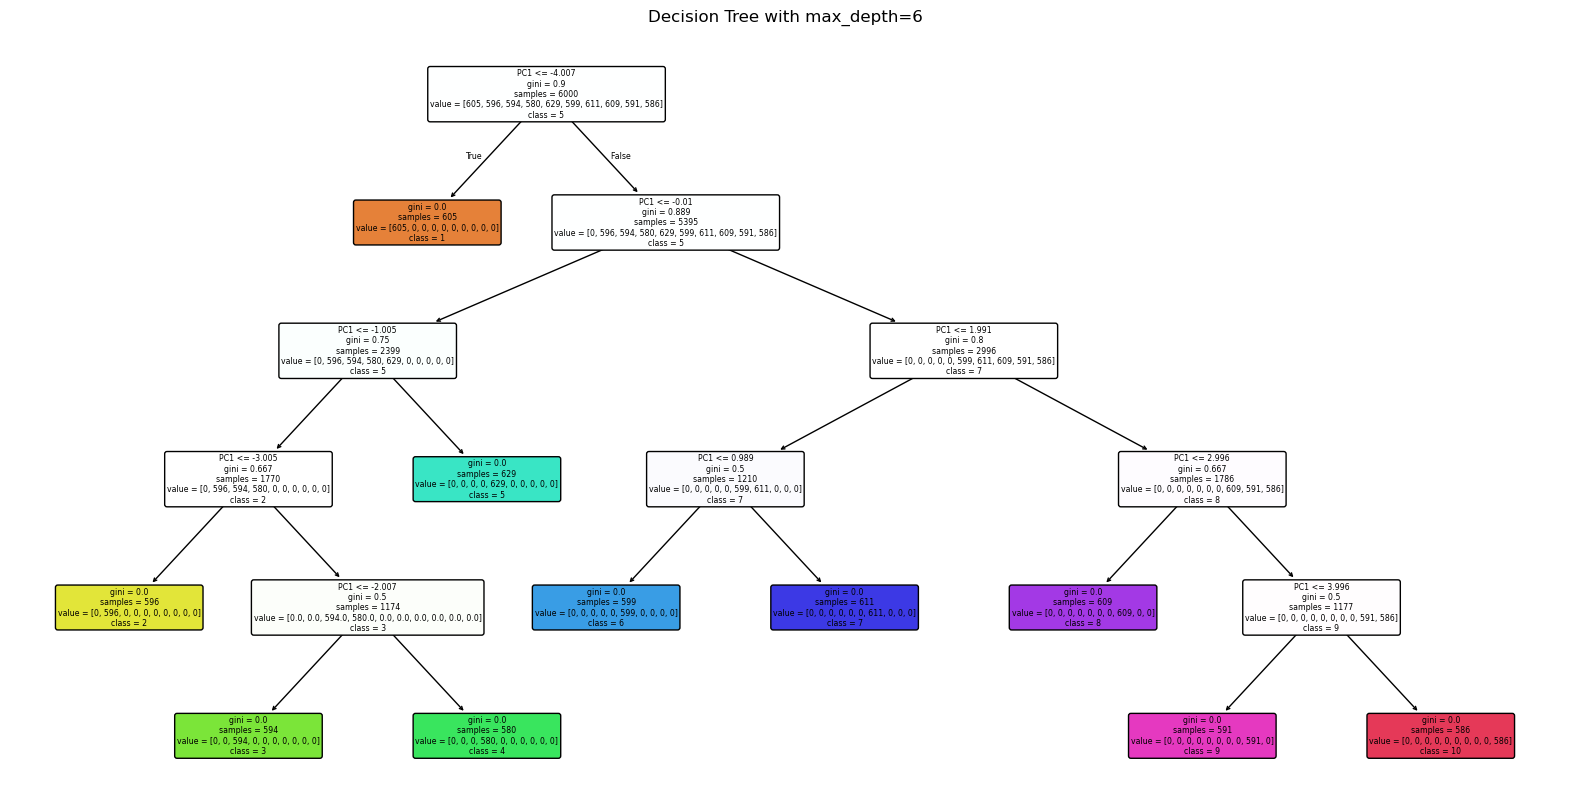

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Set up KFold Cross-Validation
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for max_depth
param_grid = {'max_depth': np.arange(1, 50)}  # Test depths from 1 to 50

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)  # Changed from train_X, train_Y to X_train, y_train

# Retrieve the best parameters and corresponding score
best_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f"✅ Best max_depth: {best_depth}")
print(f"📊 Best cross-validated accuracy: {best_score:.4f}")

# Extract mean cross-validation scores for each max_depth
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores, marker='o', label='Mean CV Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Decision Tree Performance: Mean Accuracy vs. Tree Depth')
plt.grid(True)
plt.legend()
plt.show()

# Retrain Decision Tree with best depth
best_tree_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree_clf.fit(X_train, y_train)  # Changed from train_X, train_Y to X_train, y_train

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, best_tree_clf.predict(X_test))  # Changed from test_Y, test_X to y_test, X_test
print(f"🎯 Test accuracy with max_depth={best_depth}: {test_accuracy:.4f}")

# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree_clf, feature_names=X_train.columns, class_names=[str(c) for c in best_tree_clf.classes_], filled=True, rounded=True)
plt.title(f"Decision Tree with max_depth={best_depth}")
plt.show()

# Print the tree rules (optional)
# tree_rules = export_text(best_tree_clf, feature_names=list(X_train.columns))
# print(tree_rules)

##### KNN

Test accuracy with default KNN (k=5): 0.7008
Best k: 49


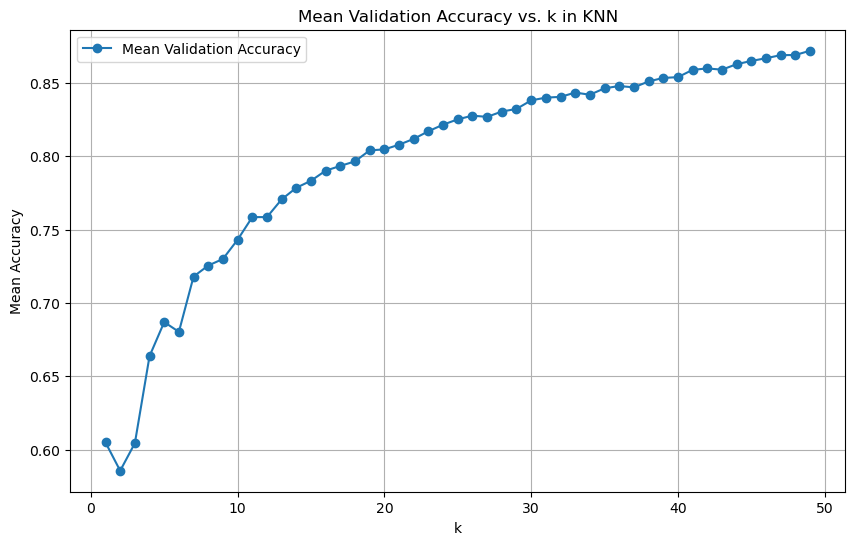

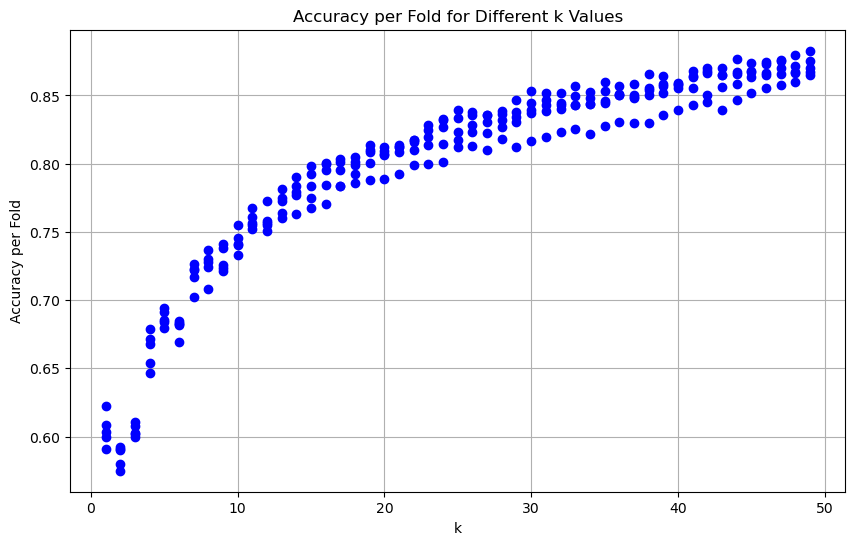

Test accuracy with k=49: 0.8838
Test accuracy with Weighted KNN and k=49: 0.8912


In [131]:
# Importar bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y, test_size=0.2, random_state=42)

# Inicializar modelo KNN con valores por defecto (k=5)
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
test_accuracy_default = knn_default.score(X_test, y_test)
print(f"Test accuracy with default KNN (k=5): {test_accuracy_default:.4f}")

# Inicializar variables para almacenar resultados
k_values = range(1, 50)
cv_accuracies = []

# Almacenar precisiones de cada fold para análisis
all_folds_accuracies = {k: [] for k in k_values}
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada para distintos valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy')
    all_folds_accuracies[k] = fold_accuracies
    cv_accuracies.append(fold_accuracies.mean())

# Encontrar el mejor valor de k (con la mejor precisión promedio)
best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k: {best_k}")

# Graficar la precisión media en validación cruzada para distintos valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, marker='o', label='Mean Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.title('Mean Validation Accuracy vs. k in KNN')
plt.legend()
plt.grid(True)
plt.show()

# Graficar precisión por fold para distintos valores de k
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot([k] * len(all_folds_accuracies[k]), all_folds_accuracies[k], 'bo', label=f'k={k}' if k == 1 else "")
plt.xlabel('k')
plt.ylabel('Accuracy per Fold')
plt.title('Accuracy per Fold for Different k Values')
plt.grid(True)
plt.show()

# Entrenar modelo con el mejor k y evaluar en el conjunto de prueba
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test accuracy with k={best_k}: {test_accuracy:.4f}")

# Mejorar con KNN Ponderado (Weighted KNN)
weighted_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
weighted_knn.fit(X_train, y_train)
weighted_test_accuracy = weighted_knn.score(X_test, y_test)
print(f"Test accuracy with Weighted KNN and k={best_k}: {weighted_test_accuracy:.4f}")


In [136]:
selected_features = [ 'Severity of Anxiety Attack (1-10)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm during attack)']
X_selected = X[selected_features]

##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,  cross_val_score, KFold

knn_default = KNeighborsClassifier() 
knn_default.fit(train_X, train_Y)
test_accuracy_default = knn_default.score(test_X, test_Y)
print(f"Test accuracy with default KNN (k=5): {test_accuracy_default:.4f}")

# Initialize variables to store results
k_values = range(1, 50)
cv_accuracies = []


# Store accuracies for each fold for analysis
all_folds_accuracies = {k: [] for k in k_values}
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = cross_val_score(knn, train_X, train_Y, cv=skf, scoring='accuracy')
    all_folds_accuracies[k] = fold_accuracies
    cv_accuracies.append(fold_accuracies.mean())

# Find the best k (highest mean accuracy)
best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k: {best_k}")

# Plot the validation accuracy across different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, marker='o', label='Mean Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.title('Mean Validation Accuracy vs. k in KNN')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracies for each fold
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot([k] * len(all_folds_accuracies[k]), all_folds_accuracies[k], 'bo', label=f'k={k}' if k == 1 else "")
plt.xlabel('k')
plt.ylabel('Accuracy per Fold')
plt.title('Accuracy per Fold for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

# Train the KNN model with the best k and evaluate on the test set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(train_X, train_Y)
test_accuracy = best_knn.score(test_X, test_Y)
print(f"Test accuracy with k={best_k}: {test_accuracy:.4f}")

# Improve by using Weighted KNN
weighted_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
weighted_knn.fit(train_X, train_Y)
weighted_test_accuracy = weighted_knn.score(test_X, test_Y)
print(f"Test accuracy with Weighted KNN and k={best_k}: {weighted_test_accuracy:.4f}")

##### Decision Tree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Set up KFold Cross-Validation
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for max_depth
param_grid = {'max_depth': np.arange(1, 50)}  # Test depths from 1 to 50

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid_search.fit(train_X, train_Y)

# Retrieve the best parameters and corresponding score
best_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f"✅ Best max_depth: {best_depth}")
print(f"📊 Best cross-validated accuracy: {best_score:.4f}")

# Extract mean cross-validation scores for each max_depth
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores, marker='o', label='Mean CV Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Decision Tree Performance: Mean Accuracy vs. Tree Depth')
plt.grid(True)
plt.legend()
plt.show()

# Retrain Decision Tree with best depth
best_tree_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree_clf.fit(train_X, train_Y)

# Evaluate on the test set
test_accuracy = accuracy_score(test_Y, best_tree_clf.predict(test_X))
print(f"🎯 Test accuracy with max_depth={best_depth}: {test_accuracy:.4f}")

# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree_clf, feature_names=train_X.columns, class_names=[str(c) for c in best_tree_clf.classes_], filled=True, rounded=True)
plt.title(f"Decision Tree with max_depth={best_depth}")
plt.show()

# Print the tree rules
#tree_rules = export_text(best_tree_clf, feature_names=list(train_X.columns))
#print(tree_rules)


##### Random Forest